In [189]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
sapling = ADatabase("sapling")

In [191]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

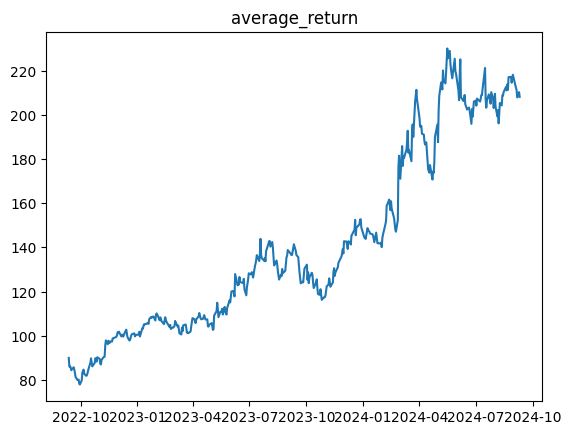

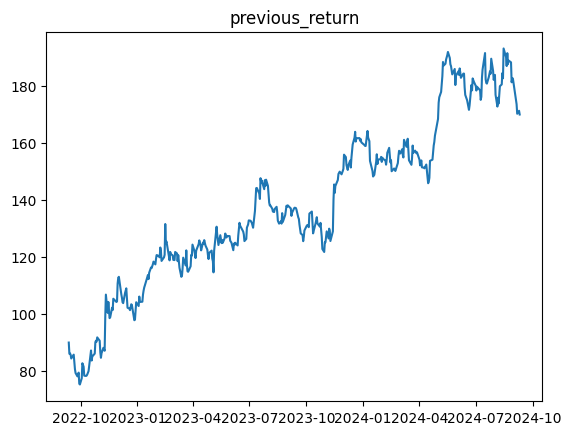

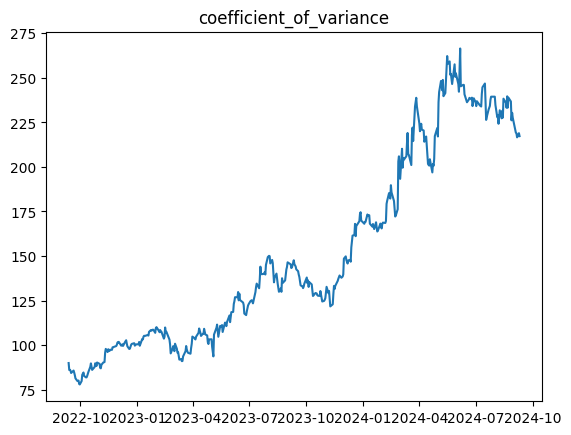

In [192]:
trades["pv"] = (trades["adjclose"] * trades["quantity"])
for name in trades["name"].unique():
    portfolio = trades.pivot_table(index=["date","name"],columns="position",values="pv").reset_index()
    portfolio = portfolio[portfolio["name"]==name]
    portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) for row in portfolio.iterrows()]
    plt.plot(portfolio["date"].values,portfolio["pv"].values)
    plt.title(name)
    plt.show()

In [193]:
portfolio.head(10)

position,date,name,0,1,2,3,4,5,6,7,8,9,pv
1,2022-09-12,coefficient_of_variance,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,90.000000
4,2022-09-13,coefficient_of_variance,9.618201,9.770851,9.137931,9.507265,9.515994,9.395037,10.000000,9.767238,9.360246,9.540143,86.072762
7,2022-09-14,coefficient_of_variance,9.632421,9.696532,9.274258,9.526216,9.415508,9.376372,10.000000,9.806763,9.458441,9.504038,86.186512
10,2022-09-15,coefficient_of_variance,9.591184,9.702725,9.352446,9.785218,8.949925,9.330259,10.000000,9.635485,9.392978,9.457482,85.740219
13,2022-09-16,coefficient_of_variance,9.369357,9.593311,9.037690,9.658876,9.107352,9.302811,10.000000,9.205094,9.143027,9.472684,84.417518
16,2022-09-20,coefficient_of_variance,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,9.530000,85.770000
19,2022-09-21,coefficient_of_variance,9.381403,9.382638,9.257132,9.417358,9.579068,9.280754,9.443522,9.480600,9.373026,9.408049,84.595501
22,2022-09-22,coefficient_of_variance,9.450748,9.314348,9.050709,9.171774,9.253768,9.002185,9.276840,9.435820,9.220182,9.217499,83.176375
25,2022-09-23,coefficient_of_variance,9.259224,9.149016,8.815051,9.039485,9.028421,8.826246,9.140627,9.121648,9.050815,9.244176,81.430532
28,2022-09-26,coefficient_of_variance,9.037980,8.793191,8.692792,8.996590,8.795805,8.607952,9.081482,9.172114,8.794699,9.212418,79.972604
